In [1]:
# ANÁLISIS DESCRIPTIVO Y EXPLORATORIO #

# Importar librerías, tablas y unirlas #

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

ventas = pd.read_csv(r'C:\Users\lvall\OneDrive\Documentos\JAUME\Curs Business Analytics\Diapositives\6- Trabajo Fin de Postgrado\data_postgrau.txt', delimiter=';')
ventas.head()

,location,country,city,department,garment_id,garment,date,sales_pcs,gross_sales,net_sales
0,5427,Italy,Catania (CT),95131,1005,1005 Jersey Fancy,202223,684,7901.16,7596.36
1,5221,Italy,Bolzano (BZ),39100,1005,1005 Jersey Fancy,202321,347,4703.53,4338.81
2,3679,Spain,Majadahonda (Madrid),28222,1018,1018 Swimwear,202325,396,6242.04,5289.35
3,1252,Spain,Palma de Mallorca,07012,1016,1016 Trousers Denim,202222,26,619.74,563.74
4,639,Belgium,Brugge,8000,1013,1013 Dresses Ladies,202326,823,23600.76,13133.92


In [2]:
# Seleccionar, renombrar y transformar variables #

    # Transformar fecha a formato correcto #
def int_to_date(yww):
   
# Transformar variable numérica a categórica
    yww_str = str(yww)
    
 # Extraer el año y el mes
    year = int(yww_str[:4])
    week = int(yww_str[4:])
    
# Definir la variable en formato fecha 
    date = datetime.datetime.strptime(f'{year}-W{week}-1', "%Y-W%W-%w").date()
    return date

# Apply the transformation to the 'week_year' column
ventas['fecha'] = ventas['date'].apply(int_to_date)

In [3]:
# Seleccionar variables #

ventas = ventas[['location','fecha','country','city','garment','sales_pcs','net_sales','gross_sales']]
ventas.head()

,location,fecha,country,city,garment,sales_pcs,net_sales,gross_sales
0,5427,2022-06-06,Italy,Catania (CT),1005 Jersey Fancy,684,7596.36,7901.16
1,5221,2023-05-22,Italy,Bolzano (BZ),1005 Jersey Fancy,347,4338.81,4703.53
2,3679,2023-06-19,Spain,Majadahonda (Madrid),1018 Swimwear,396,5289.35,6242.04
3,1252,2022-05-30,Spain,Palma de Mallorca,1016 Trousers Denim,26,563.74,619.74
4,639,2023-06-26,Belgium,Brugge,1013 Dresses Ladies,823,13133.92,23600.76


In [4]:
# Eliminar los días del mes de mayo del 2024, puesto que no tenemos los datos de todo el mes #

ventas = ventas[ventas['fecha'] < datetime.date(2024, 5, 1)]
ventas.tail()

,location,fecha,country,city,garment,sales_pcs,net_sales,gross_sales
1225424,6125,2022-06-27,Italy,Salerno (SA),1003 Knitwear,8,130.41,129.92
1225425,6506,2024-04-01,Belgium,Eupen,1020 Shoes,13,282.60,358.87
1225426,1897,2023-01-30,Spain,L. Palmas de Gran Canaria,1012 Skirts,3,40.97,79.97
1225427,3676,2022-04-04,Spain,Castelldefels,1007 Outdoor,3,157.97,169.97
1225428,1817,2023-05-15,Spain,Girona,1007 Outdoor,1,34.99,59.99


In [5]:
# Renombrar las columnas y eliminar el 'garment id' de la variable 'garment' #

ventas = ventas.rename(columns={'location':'tienda','country':'país','city':'ciudad','net_sales':'ventas','gross_sales':'ventas_brutas','garment':'producto','sales_pcs':'unidades'})
ventas['producto'] = ventas['producto'].str.slice(5)

ventas.head()

,tienda,fecha,país,ciudad,producto,unidades,ventas,ventas_brutas
0,5427,2022-06-06,Italy,Catania (CT),Jersey Fancy,684,7596.36,7901.16
1,5221,2023-05-22,Italy,Bolzano (BZ),Jersey Fancy,347,4338.81,4703.53
2,3679,2023-06-19,Spain,Majadahonda (Madrid),Swimwear,396,5289.35,6242.04
3,1252,2022-05-30,Spain,Palma de Mallorca,Trousers Denim,26,563.74,619.74
4,639,2023-06-26,Belgium,Brugge,Dresses Ladies,823,13133.92,23600.76


In [6]:
# contar el numero de tiendas por ciudad

ventas.groupby('ciudad')['tienda'].nunique()

# ordenar las ciudades por numero de tiendas 

ventas.groupby('ciudad')['tienda'].nunique().sort_values(ascending=False)

# mostrar las 10 ciudades con más tiendas

ventas.groupby('ciudad')['tienda'].nunique().sort_values(ascending=False).head(10).reset_index()

,ciudad,tienda
0,Madrid,17
1,Roma (RM),12
2,Milano (MI),9
3,Bruxelles,8
4,Lisboa,6
5,Barcelona,5
6,Sevilla,5
7,Marseille,5
8,Paris,5
9,Toulouse,5


In [7]:
# contar el número de tiendas

ventas['tienda'].nunique()

585

In [8]:
# VISUALIZACIÓN DE DATOS #

# Evolución de las unidades vendidas #

ventas_fecha = ventas.groupby(['fecha']).agg({'unidades':'sum'}).reset_index()
ventas_fecha.head()

,fecha,unidades
0,2022-01-03,1804835
1,2022-01-10,2136002
2,2022-01-17,1718743
3,2022-01-24,1475366
4,2022-01-31,1286458


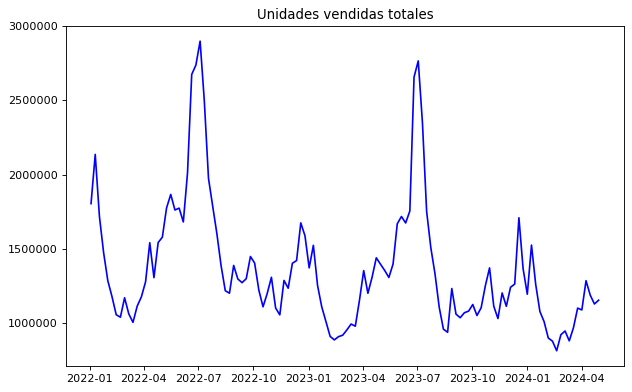

In [9]:
# Gráfico del total de unidades vendidas #

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['figure.dpi'] = 80

plt.plot(ventas_fecha.fecha, ventas_fecha.unidades, color='blue')
plt.title('Unidades vendidas totales')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

In [10]:
# Unidades vendidas por países y fecha #

# Cálculos de las tablas #

ventas_países = ventas.groupby(['fecha','país']).agg({'unidades':'sum'}).reset_index()

ventas_españa = ventas_países[ventas_países['país'] == 'Spain']
ventas_belgica = ventas_países[ventas_países['país'] == 'Belgium']
ventas_francia = ventas_países[ventas_países['país'] == 'France']
ventas_italia = ventas_países[ventas_países['país'] == 'Italy']

In [11]:
# Unidades por países - totales # 
    
# Cálculos de las tablas #

ventas_países_total = ventas.groupby(['país']).agg({'unidades':'sum'}).reset_index()
ventas_países_total.head()

,país,unidades
0,Belgium,19766078
1,France,64949295
2,Italy,41301963
3,Luxembourg,2632749
4,Portugal,7581744


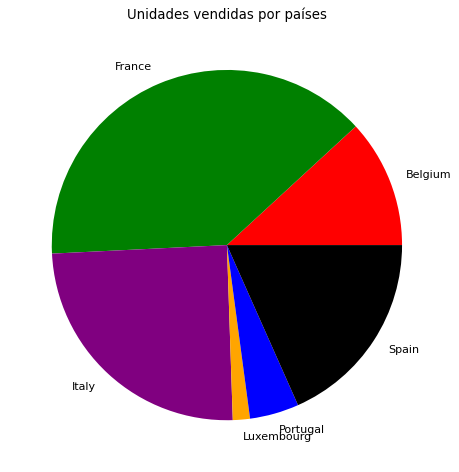

In [12]:
# Visualización pie chart # 

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 80
    
plt.pie(x= ventas_países_total.unidades, labels= ventas_países_total.país, colors=['red','green','purple','orange','blue','black'])

plt.title('Unidades vendidas por países')
plt.tight_layout()

plt.show()

In [13]:
# Evolución del porcentaje de unidades vendidas por países #
    
# Cálculos de las tablas #

ventas_países = ventas.groupby(['fecha', 'país']).agg({'unidades':'sum'}).reset_index()
porc_ventas_totales_fecha = ventas_países.groupby('fecha')['unidades'].transform('sum')
ventas_países['porc_ventas'] = (ventas_países['unidades'] / porc_ventas_totales_fecha)*100

porc_ventas_españa = ventas_países[ventas_países['país'] == 'Spain']
porc_ventas_belgica = ventas_países[ventas_países['país'] == 'Belgium']
porc_ventas_francia = ventas_países[ventas_países['país'] == 'France']
porc_ventas_italia = ventas_países[ventas_países['país'] == 'Italy']

ventas_países.head(6)

,fecha,país,unidades,porc_ventas
0,2022-01-03,Belgium,345843,19.162029
1,2022-01-03,France,373057,20.669867
2,2022-01-03,Italy,439805,24.368156
3,2022-01-03,Luxembourg,34614,1.917848
4,2022-01-03,Portugal,38102,2.111107
5,2022-01-03,Spain,573414,31.770993


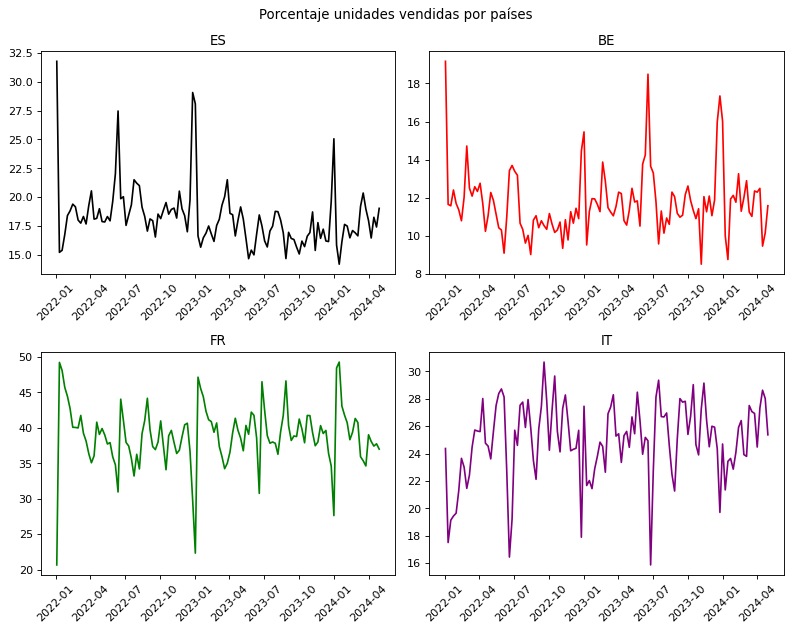

In [14]:
# Visualización en subplots #
    
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.dpi'] = 80

plt.suptitle('Porcentaje unidades vendidas por países')

plt.subplot(2, 2, 1)
plt.plot(porc_ventas_españa.fecha, porc_ventas_españa.porc_ventas, color='black')
plt.title('ES')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.plot(porc_ventas_belgica.fecha, porc_ventas_belgica.porc_ventas, color='red')
plt.title('BE')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.plot(porc_ventas_francia.fecha, porc_ventas_francia.porc_ventas, color='green')
plt.title('FR')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.plot(porc_ventas_italia.fecha, porc_ventas_italia.porc_ventas, color='purple')
plt.title('IT')
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [15]:
# Unidades vendidas por producto y mes #

# Crear una columna con el mes y el año

ventas['fecha'] = pd.to_datetime(ventas['fecha'], errors='coerce')
ventas['mes'] = ventas['fecha'].dt.month
ventas['año'] = ventas['fecha'].dt.year

ventas.head()

,tienda,fecha,país,ciudad,producto,unidades,ventas,ventas_brutas,mes,año
0,5427,2022-06-06,Italy,Catania (CT),Jersey Fancy,684,7596.36,7901.16,6,2022
1,5221,2023-05-22,Italy,Bolzano (BZ),Jersey Fancy,347,4338.81,4703.53,5,2023
2,3679,2023-06-19,Spain,Majadahonda (Madrid),Swimwear,396,5289.35,6242.04,6,2023
3,1252,2022-05-30,Spain,Palma de Mallorca,Trousers Denim,26,563.74,619.74,5,2022
4,639,2023-06-26,Belgium,Brugge,Dresses Ladies,823,13133.92,23600.76,6,2023


In [16]:
#filtrar las unidades vendidas del año 2022 y 2023

ventas_2022_2023 = ventas[(ventas['año'] == 2022) | (ventas['año'] == 2023)]

# Agrupar los datos por producto y mes

ventas_productos_mes = ventas_2022_2023.groupby(['producto', 'mes']).agg({'unidades': 'sum'}).reset_index()
ventas_productos_mes.head()

,producto,mes,unidades
0,Accessories,1,2440356
1,Accessories,2,1455221
2,Accessories,3,1374849
3,Accessories,4,1675266
4,Accessories,5,2095605


In [17]:
# Identificar los productos que presentan un mayor grado de estacionalidad entre abril y julio

# Paso 1: Filtrar los meses 4, 5, 6 y 7
meses_seleccionados = [4, 5, 6, 7]
ventas_meses_seleccionados = ventas_productos_mes[ventas_productos_mes['mes'].isin(meses_seleccionados)]

# Paso 2: Calcular la suma de unidades por producto de los meses seleccionados
unidades_por_producto = ventas_meses_seleccionados.groupby('producto')['unidades'].sum()

# Paso 3: Calcular el porcentaje de unidades de cada producto del total de meses
unidades_productos_total = ventas_productos_mes.groupby('producto')['unidades'].sum()
porcentaje_unidades = (unidades_por_producto / unidades_productos_total)*100
porcentaje_unidades.sort_values(ascending=False).reset_index()

,producto,unidades
0,Shorts,91.919892
1,Swimwear,83.781941
2,Dresses Ladies,58.634188
3,Shoes,53.041023
4,Unknown,50.280730
5,Blouses,48.129980
6,Jersey Fancy,47.749824
7,Jersey Basic,47.572199
8,Skirts,42.520115
9,Shirts,42.318349


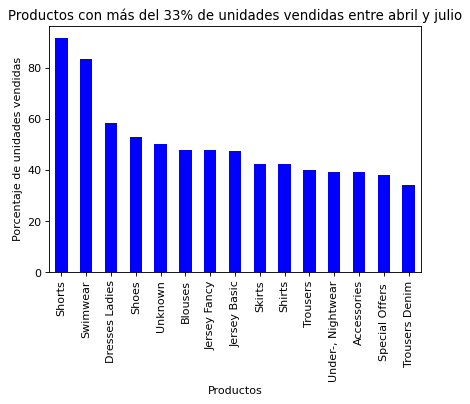

In [18]:
# Paso 4: Seleccionar los productos con un porcentaje de unidades mayor al 33%

productos_seleccionados = porcentaje_unidades[porcentaje_unidades > 33]
productos_ordenados = productos_seleccionados.sort_values(ascending=False)

#hacer un gráfico de barras con los productos_ordenados

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 80

productos_ordenados.plot(kind='bar', color='blue')
plt.title('Productos con más del 33% de unidades vendidas entre abril y julio')
plt.xlabel('Productos')
plt.ylabel('Porcentaje de unidades vendidas')

plt.show()

In [19]:
# Identificar los productos que presentan un mayor grado de estacionalidad entre noviembre y enero

# Paso 1: Filtrar los meses 11, 12 y 1
meses_seleccionados_invierno = [1, 11, 12]
ventas_meses_seleccionados_invierno = ventas_productos_mes[ventas_productos_mes['mes'].isin(meses_seleccionados_invierno)]

# Paso 2: Calcular la suma de unidades por producto de los meses seleccionados
unidades_por_producto_invierno = ventas_meses_seleccionados_invierno.groupby('producto')['unidades'].sum()

# Paso 3: Calcular el porcentaje de unidades de cada producto del total de meses
unidades_productos_total_invierno = ventas_productos_mes.groupby('producto')['unidades'].sum()
porcentaje_unidades_invierno = (unidades_por_producto_invierno / unidades_productos_total_invierno)*100
porcentaje_unidades_invierno.sort_values(ascending=False).reset_index()

,producto,unidades
0,Outdoor,56.517574
1,Knitwear,48.785994
2,Unknown,46.380590
3,Socks and Tights,36.413404
4,Special Offers,32.520190
5,Dressed,28.759969
6,Accessories,27.016705
7,Trousers Denim,26.938540
8,"Under-, Nightwear",23.900385
9,Skirts,23.540739


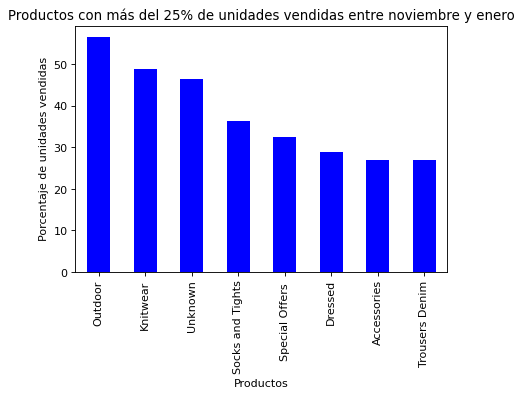

In [20]:
#seleccionar los productos con porcentaje de unidades mayor al 25%

productos_seleccionados_invierno = porcentaje_unidades_invierno[porcentaje_unidades_invierno > 25]
productos_ordenados_invierno = productos_seleccionados_invierno.sort_values(ascending=False)


#hacer un gráfico de barras con los productos_ordenados
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 80

productos_ordenados_invierno.plot(kind='bar', color='blue')
plt.title('Productos con más del 25% de unidades vendidas entre noviembre y enero')
plt.xlabel('Productos')
plt.ylabel('Porcentaje de unidades vendidas')

plt.show()

In [21]:
# Unidades vendidos por ciudades - totales # 
    
# Cálculos de las tablas #

ventas_ciudades_total = ventas.groupby(['país','ciudad']).agg({'unidades':'sum'}).reset_index()
mayores_ventas_ciudades = ventas_ciudades_total.sort_values(by='unidades', ascending=False)

mayores_ventas_ciudades.head(10)

,país,ciudad,unidades
147,France,Paris,5737593
355,Spain,Madrid,5270505
262,Italy,Roma (RM),4899686
237,Italy,Milano (MI),3751194
6,Belgium,Bruxelles,3335098
301,Portugal,Lisboa,2726517
320,Spain,Barcelona,2691678
125,France,Marseille,2659433
218,Italy,Firenze (FI),1705410
70,France,Bordeaux,1627577


In [22]:
# Unidades vendidas por ciudades - % totales # 
    
# Cálculos de las tablas #

mayores_ventas_ciudades['total_ventas'] = mayores_ventas_ciudades['unidades'].sum()
mayores_ventas_ciudades['porc_ventas'] = mayores_ventas_ciudades['unidades']/mayores_ventas_ciudades['total_ventas']*100

mayores_ventas_ciudades.head(10)

,país,ciudad,unidades,total_ventas,porc_ventas
147,France,Paris,5737593,166835864,3.439065
355,Spain,Madrid,5270505,166835864,3.159096
262,Italy,Roma (RM),4899686,166835864,2.936830
237,Italy,Milano (MI),3751194,166835864,2.248434
6,Belgium,Bruxelles,3335098,166835864,1.999029
301,Portugal,Lisboa,2726517,166835864,1.634251
320,Spain,Barcelona,2691678,166835864,1.613369
125,France,Marseille,2659433,166835864,1.594042
218,Italy,Firenze (FI),1705410,166835864,1.022208
70,France,Bordeaux,1627577,166835864,0.975556


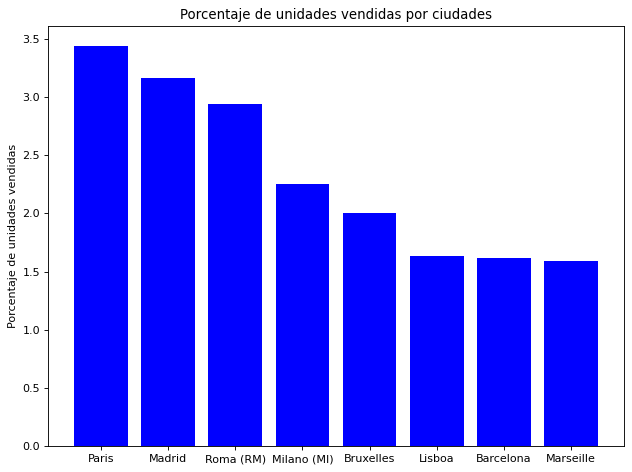

In [23]:
# extraer tabla de ventas por ciudades con más del 1.5% de las ventas totales

ventas_mayores_ciudades = mayores_ventas_ciudades[mayores_ventas_ciudades['porc_ventas']>1.5]

# Visualización de las ventas por ciudades #

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 80

plt.bar(ventas_mayores_ciudades.ciudad, ventas_mayores_ciudades.porc_ventas, color='blue')
plt.title('Porcentaje de unidades vendidas por ciudades')
plt.ylabel('Porcentaje de unidades vendidas')
plt.tight_layout()

plt.show()

In [24]:
# Unidades vendidas por productos - totales # 
    
# Cálculos de las tablas #

ventas_productos = ventas.groupby(['producto']).agg({'unidades':'sum'}).reset_index()
mayores_ventas_productos = ventas_productos.sort_values(by='unidades', ascending=False)

mayores_ventas_productos.head(10)

,producto,unidades
0,Accessories,27547533
5,Jersey Fancy,25286063
17,"Under-, Nightwear",22093755
4,Jersey Basic,19450411
12,Socks and Tights,14395223
15,Trousers,9402813
3,Dresses Ladies,8541845
6,Knitwear,8536362
1,Blouses,5626906
14,Swimwear,5610096


In [25]:
# Unidades por productos - % totales # 
    
# Cálculos de las tablas #

mayores_ventas_productos['total_ventas'] = mayores_ventas_productos['unidades'].sum()
mayores_ventas_productos['porc_ventas'] = mayores_ventas_productos['unidades']/ mayores_ventas_productos['total_ventas']*100

mayores_ventas_productos.head()

,producto,unidades,total_ventas,porc_ventas
0,Accessories,27547533,166835864,16.511757
5,Jersey Fancy,25286063,166835864,15.156251
17,"Under-, Nightwear",22093755,166835864,13.242809
4,Jersey Basic,19450411,166835864,11.658411
12,Socks and Tights,14395223,166835864,8.628374


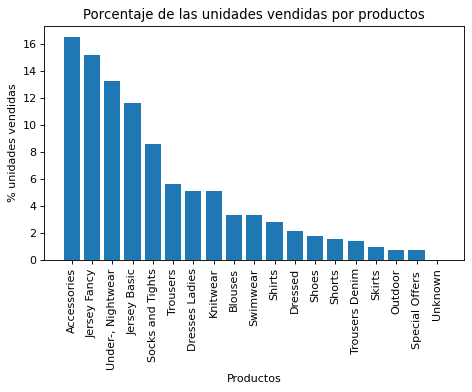

In [26]:
# Visualización de los datos #
    
plt.figure(figsize=(6, 5)) 
plt.bar(mayores_ventas_productos.producto, mayores_ventas_productos.porc_ventas)

plt.title('Porcentaje de las unidades vendidas por productos')
plt.xlabel('Productos')
plt.ylabel('% unidades vendidas')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [27]:
# Unidades vendidas por países y productos - totales # 
    
# Cálculos de las tablas #

ventas_países_productos = ventas.groupby(['país','producto']).agg({'unidades':'sum'}).reset_index()

ventas_francia_productos = ventas_países_productos[ventas_países_productos['país']=='France']
ventas_francia_productos = ventas_francia_productos.sort_values(by='unidades', ascending=False)

ventas_italia_productos = ventas_países_productos[ventas_países_productos['país']=='Italy']
ventas_italia_productos = ventas_italia_productos.sort_values(by='unidades', ascending=False)

ventas_españa_productos = ventas_países_productos[ventas_países_productos['país']=='Spain']
ventas_españa_productos = ventas_españa_productos.sort_values(by='unidades', ascending=False)

ventas_belgica_productos = ventas_países_productos[ventas_países_productos['país']=='Belgium']
ventas_belgica_productos = ventas_belgica_productos.sort_values(by='unidades', ascending=False)

ventas_francia_productos.head(10)

,país,producto,unidades
19,France,Accessories,10653065
24,France,Jersey Fancy,9068776
36,France,"Under-, Nightwear",8706196
23,France,Jersey Basic,8200081
31,France,Socks and Tights,5421752
34,France,Trousers,3628557
25,France,Knitwear,3530916
22,France,Dresses Ladies,3417967
33,France,Swimwear,2180190
20,France,Blouses,2158548


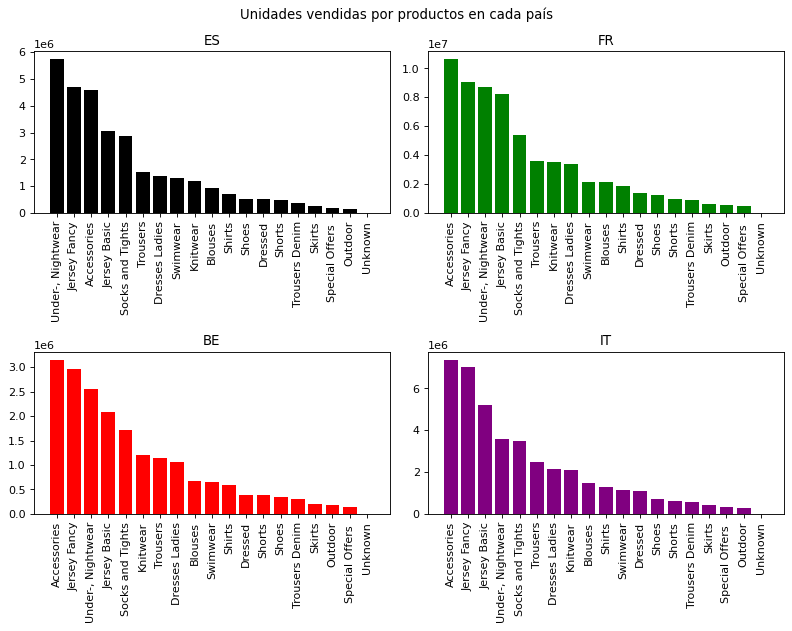

In [28]:
# Visualización de los datos #
    
plt.figure(figsize=(10, 8)) 
plt.suptitle('Unidades vendidas por productos en cada país')

plt.subplot(2, 2, 1)
plt.bar(ventas_españa_productos.producto, ventas_españa_productos.unidades, color='black')
plt.title('ES')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
plt.bar(ventas_francia_productos.producto, ventas_francia_productos.unidades, color='green')
plt.title('FR')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
plt.bar(ventas_belgica_productos.producto, ventas_belgica_productos.unidades, color='red')
plt.title('BE')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
plt.bar(ventas_italia_productos.producto, ventas_italia_productos.unidades, color='purple')
plt.title('IT')
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [73]:
# AGRUPACIÓN DE LAS TIENDAS #

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ventas_kmeans = pd.read_csv(r'C:\Users\lvall\OneDrive\Documentos\JAUME\Curs Business Analytics\Diapositives\6- Trabajo Fin de Postgrado\data_postgrau.txt', delimiter=';')

ventas_kmeans = ventas_kmeans[['location','date','country','city','garment','gross_sales','net_sales','sales_pcs']]
ventas_kmeans = ventas_kmeans.rename(columns={'location':'tienda','date':'fecha','country':'país','city':'ciudad','net_sales':'ventas_netas','gross_sales':'ventas_brutas','garment':'producto','sales_pcs':'unidades'})
ventas_kmeans['producto'] = ventas_kmeans['producto'].str.slice(5)
ventas_kmeans['tienda'] = ventas_kmeans['tienda'].astype('object')
ventas_kmeans['fecha'] = ventas_kmeans['fecha'].astype(str)
ventas_kmeans['año'] = ventas_kmeans['fecha'].str[:4]

ventas_kmeans.head()

,tienda,fecha,país,ciudad,producto,ventas_brutas,ventas_netas,unidades,año
0,5427,202223,Italy,Catania (CT),Jersey Fancy,7901.16,7596.36,684,2022
1,5221,202321,Italy,Bolzano (BZ),Jersey Fancy,4703.53,4338.81,347,2023
2,3679,202325,Spain,Majadahonda (Madrid),Swimwear,6242.04,5289.35,396,2023
3,1252,202222,Spain,Palma de Mallorca,Trousers Denim,619.74,563.74,26,2022
4,639,202326,Belgium,Brugge,Dresses Ladies,23600.76,13133.92,823,2023


In [76]:
# Calcular el porcentaje medio de descuentos por tienda

porc_desc_tiendas = ventas_kmeans.groupby(['tienda']).agg({'ventas_netas':'sum', 'ventas_brutas':'sum', 'unidades':'sum'}).reset_index()
porc_desc_tiendas['porc_desc'] = ((porc_desc_tiendas['ventas_brutas']-porc_desc_tiendas['ventas_netas'])/porc_desc_tiendas['ventas_brutas'])*100

# Eliminar tiendas con un porcentaje de descuento superior al 0% e inferior al 90%

filtro_descuentos = porc_desc_tiendas['porc_desc']>0
filtro_descuentos = porc_desc_tiendas['porc_desc']<90
porc_desc_tiendas = porc_desc_tiendas[filtro_descuentos]

porc_desc_tiendas.head()

,tienda,ventas_netas,ventas_brutas,unidades,porc_desc
0,134,34126805.11,38632554.62,2287752,11.663090
1,441,5150403.52,5860745.25,397858,12.120331
2,443,8112152.16,9376857.34,546434,13.487516
3,444,888072.58,1196791.61,77701,25.795554
4,448,6701566.96,8052742.85,453858,16.779077


C:\Users\lvall\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


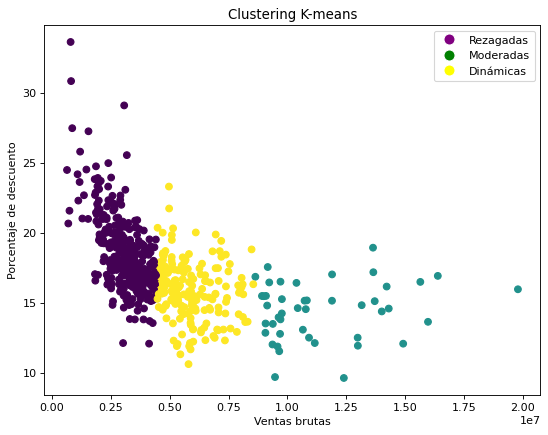

In [78]:
# hacer un kmeans entre las tiendas segun el porcentaje de descuento y las ventas brutas

ventas_kmeans_desc = porc_desc_tiendas[['porc_desc','ventas_brutas']]
ventas_kmeans_desc.head()

# filtrar 'outliers' para hacer la agrupación

filtro_ventas_pequeñas = ventas_kmeans_desc['ventas_brutas']>500000
filtro_ventas_grandes = ventas_kmeans_desc['ventas_brutas']<20000000

ventas_kmeans_desc = ventas_kmeans_desc[filtro_ventas_grandes&filtro_ventas_pequeñas]

# Ajustar el modelo a los datos

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(ventas_kmeans_desc)

# Obtener los centroides y las etiquetas de los clusters

centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

# Visualizar los clusters

plt.figure(figsize=(8,6))
plt.scatter(ventas_kmeans_desc['ventas_brutas'], ventas_kmeans_desc['porc_desc'], c=etiquetas, cmap='viridis')

plt.title('Clustering K-means')
plt.xlabel('Ventas brutas')
plt.ylabel('Porcentaje de descuento')

# introducir la leyenda de los colores

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Rezagadas'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Moderadas'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Dinámicas')])


# Mostrar el gráfico
plt.show()